In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv(r"C:\Users\HP\OneDrive\Documents\Data Science-Self\Data SCience Community\My Uber Drives - 2016.csv")
df.head(5)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [3]:
df.shape

(1156, 7)

In [4]:
df.columns

Index(['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'MILES*',
       'PURPOSE*'],
      dtype='object')

In [83]:
df.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [5]:
df[df["END_DATE*"].isnull()]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [3]:
df.drop(df[df["END_DATE*"].isnull()].index,axis=0,inplace=True)

##### As we can see this row contains wrong data for most of the columns. We will delete it

#### Dropping purpose column since it has around 50% null values

In [4]:
df.drop("PURPOSE*", axis=1, inplace=True)

In [7]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7


In [8]:
df.duplicated().sum()

1

In [5]:
df.drop(df[df.duplicated()].index,axis=0,inplace=True)

In [50]:
df.shape

(1154, 6)

In [90]:
df.dtypes

START_DATE*     object
END_DATE*       object
CATEGORY*       object
START*          object
STOP*           object
MILES*         float64
dtype: object

In [6]:
 df['START_DATE*'] = pd.to_datetime(df['START_DATE*'], format='%m/%d/%Y %H:%M')

In [92]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*
0,2016-01-01 21:11:00,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1
1,2016-01-02 01:25:00,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0
2,2016-01-02 20:25:00,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8
3,2016-01-05 17:31:00,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7
4,2016-01-06 14:42:00,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7


In [7]:

df['END_DATE*'] = pd.to_datetime(df['END_DATE*'], format='%m/%d/%Y %H:%M')

In [94]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7


### EDA

In [9]:
df["CATEGORY*"].value_counts()

Business    1077
Personal      77
Name: CATEGORY*, dtype: int64

In [10]:
#df.groupby("CATEGORY*")["MILES*"].sum().reset_index()
data=pd.DataFrame(df.groupby("CATEGORY*")["MILES*"].sum().reset_index())
data

,CATEGORY*,MILES*
0,Business,11477.1
1,Personal,717.7


In [11]:
business_miles_covered = (data["MILES*"][0]/data["MILES*"].sum())*100
personal_miles_covered = (data["MILES*"][1]/data["MILES*"].sum())*100
print("% of Business Miles : ",business_miles_covered)
print("% of Personal Miles : ",personal_miles_covered)

% of Business Miles :  94.11470462820219
% of Personal Miles :  5.885295371797816


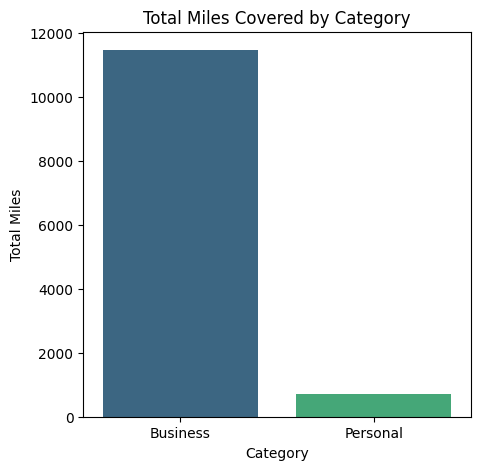

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group the data by "CATEGORY*" and sum the "MILES*" column
#data = df.groupby("CATEGORY*")["MILES*"].sum().reset_index()

# Create a bar plot
plt.figure(figsize=(5, 5))
sns.barplot(x="CATEGORY*", y="MILES*", data=data, palette="viridis")
plt.title("Total Miles Covered by Category")
plt.xlabel("Category")
plt.ylabel("Total Miles")


# Show the plot
plt.show()


In [17]:
data=df["START*"].value_counts()[0:10]
starting_point_name=list(data.index)
starting_point_frequency=list(data)  #*it will sore frequency 
starting_point_data=pd.DataFrame({"starting_point":starting_point_name,"frequency":starting_point_frequency})


<BarContainer object of 10 artists>

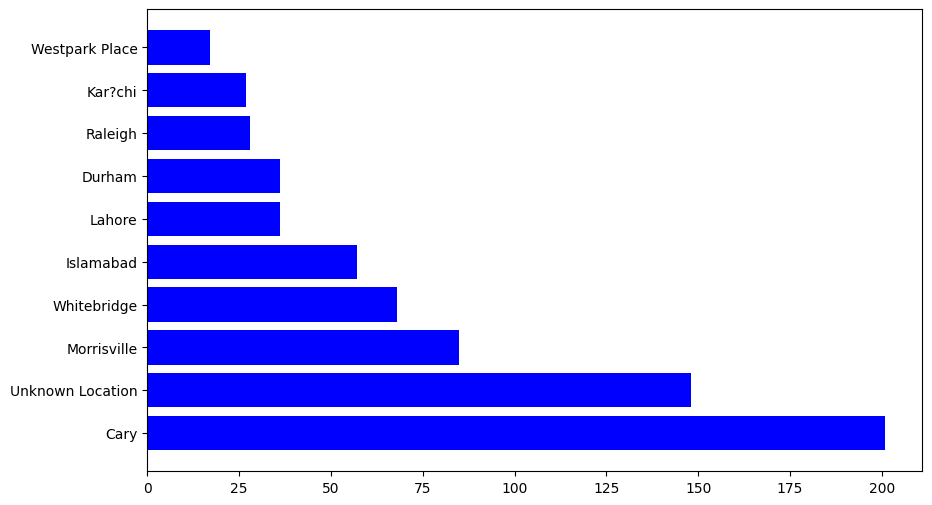

In [18]:
plt.figure(figsize=(10, 6))
plt.barh(starting_point_name, starting_point_frequency, color='blue')


In [19]:
data=df["STOP*"].value_counts()[0:10]
stop_point_names=list(data.index)
stop_point_frequency=list(data)  #*it will sore frequency 
stopping_point_data=pd.DataFrame({"ending_point":stop_point_names,"frequency":stop_point_frequency})
stopping_point_data

,ending_point,frequency
0,Cary,202
1,Unknown Location,149
2,Morrisville,84
3,Whitebridge,65
4,Islamabad,58
5,Durham,36
6,Lahore,36
7,Raleigh,29
8,Kar?chi,26
9,Apex,17


<BarContainer object of 10 artists>

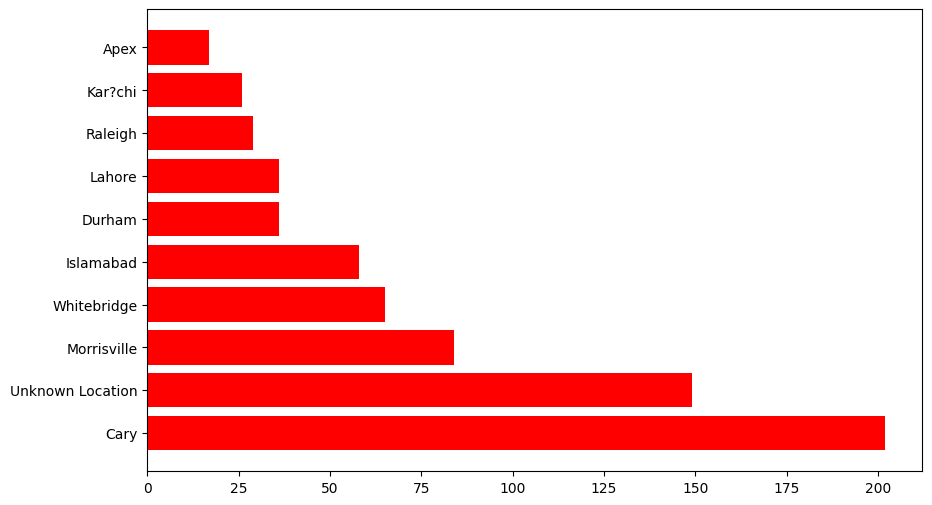

In [20]:
plt.figure(figsize=(10, 6))
plt.barh(stop_point_names, stop_point_frequency, color='red')

In [8]:
def round_trip(df):
    if(df["START*"]==df["STOP*"]):
        return 1
    else:
        return 0
df["ROUND_TRIP*"]=df.apply(round_trip,axis=1) 

In [9]:
df

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,ROUND_TRIP*
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,1
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,1
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,1
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,1
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,0
...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,1
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,0
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,1
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,0


In [71]:
labels=["No","Yes"]
round_trip=df["ROUND_TRIP*"].value_counts()
round_trip=list(round_trip)

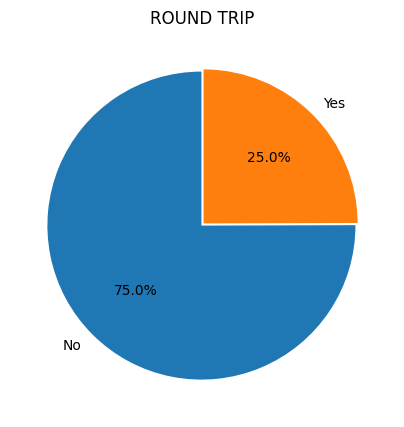

In [72]:
plt.figure(figsize=(5, 5))
plt.pie(round_trip, labels=labels, autopct='%1.1f%%', startangle=90,explode=[0.01,0.01])
plt.title('ROUND TRIP')
plt.show()

In [10]:
df["Ride_Duration"]=df["END_DATE*"]-df["START_DATE*"]
df

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,ROUND_TRIP*,Ride_Duration
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,1,0 days 00:06:00
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,1,0 days 00:12:00
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,1,0 days 00:13:00
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,1,0 days 00:14:00
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,0,0 days 01:07:00
...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,1,0 days 00:07:00
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,0,0 days 00:18:00
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,1,0 days 00:35:00
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,0,0 days 00:18:00


In [11]:
#pd.to_datetime(df['START_DATE*']).dt.month
df["month"]=pd.to_datetime(df["START_DATE*"]).dt.month
df["year"]=pd.to_datetime(df["START_DATE*"]).dt.year
df["day"]=pd.to_datetime(df["START_DATE*"]).dt.day
df["staring_hour"]=pd.to_datetime(df["START_DATE*"]).dt.hour
df["ending_hour"]=pd.to_datetime(df["END_DATE*"]).dt.hour

In [29]:
df

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,ROUND_TRIP*,Ride_Duration,month,year,day,staring_hour,ending_hour
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,1,0 days 00:06:00,1,2016,1,21,21
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,1,0 days 00:12:00,1,2016,2,1,1
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,1,0 days 00:13:00,1,2016,2,20,20
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,1,0 days 00:14:00,1,2016,5,17,17
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,0,0 days 01:07:00,1,2016,6,14,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,1,0 days 00:07:00,12,2016,31,1,1
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,0,0 days 00:18:00,12,2016,31,13,13
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,1,0 days 00:35:00,12,2016,31,15,15
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,0,0 days 00:18:00,12,2016,31,21,21


In [12]:
df["day_of_week"]=pd.to_datetime(df['START_DATE*']).dt.dayofweek
days={0:"Monday",1:"Tuesday",2:"Wednesday",3:"Thursday",4:"Friday",5:"Saturday",6:"Sunday"}
df["day_of_week"]=df["day_of_week"].apply(lambda x : days[x])

In [13]:
months={1:"January",2:"February",3:"March",4:"April",5:"May",6:"June",7:"July",8:"August",9:"September",10:"October",11:"November",12:"December"}
df["month_of_year"]=df['month'].apply(lambda x : months[x])

C:\Users\HP\AppData\Local\Temp\ipykernel_24792\2752251448.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  miles_in_month=pd.DataFrame(df.groupby('month_of_year').sum()["MILES*"])


,MILES*
month_of_year,
April,1113.0
August,1335.5
December,981.3
February,908.2
January,512.9
July,1224.6
June,832.9
March,1693.9
May,363.8


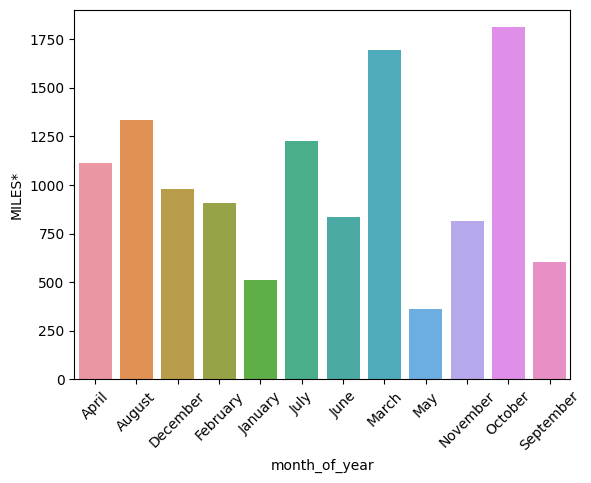

In [15]:
miles_in_month=pd.DataFrame(df.groupby('month_of_year').sum()["MILES*"])

sns.barplot(x=miles_in_month.index, y='MILES*', data=miles_in_month, order=miles_in_month.index.unique())
plt.xticks(rotation=45)
miles_in_month

larger distance is covered in October

In [50]:
#type(df["START_DATE*"].dt.minute[0])
df["month_of_year"].value_counts()

December     146
August       133
November     122
February     115
March        113
July         112
June         107
October      106
January       61
April         54
May           49
September     36
Name: month_of_year, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'December'),
  Text(1, 0, 'August'),
  Text(2, 0, 'November'),
  Text(3, 0, 'February'),
  Text(4, 0, 'March'),
  Text(5, 0, 'July'),
  Text(6, 0, 'June'),
  Text(7, 0, 'October'),
  Text(8, 0, 'January'),
  Text(9, 0, 'April'),
  Text(10, 0, 'May'),
  Text(11, 0, 'September')])

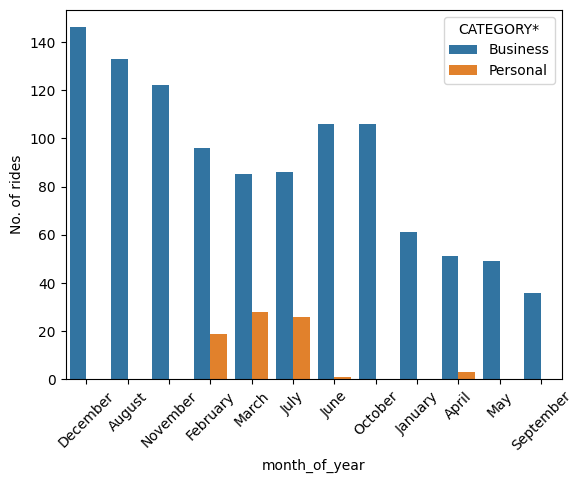

In [33]:
sns.countplot(x='month_of_year',data=df,hue="CATEGORY*",order=pd.value_counts(df['month_of_year']).index,orient='h',width=0.8)
plt.ylabel("No. of rides")
plt.xticks(rotation=45)

In [38]:
total_miles_on_day=pd.DataFrame(df.groupby('day_of_week').sum()["MILES*"])
total_miles_on_day

C:\Users\HP\AppData\Local\Temp\ipykernel_24792\3322666109.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_miles_on_day=pd.DataFrame(df.groupby('day_of_week').sum()["MILES*"])


,MILES*
day_of_week,
Friday,2595.0
Monday,1387.4
Saturday,1976.3
Sunday,1696.4
Thursday,1818.0
Tuesday,1471.8
Wednesday,1249.9


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Friday'),
  Text(1, 0, 'Monday'),
  Text(2, 0, 'Saturday'),
  Text(3, 0, 'Sunday'),
  Text(4, 0, 'Thursday'),
  Text(5, 0, 'Tuesday'),
  Text(6, 0, 'Wednesday')])

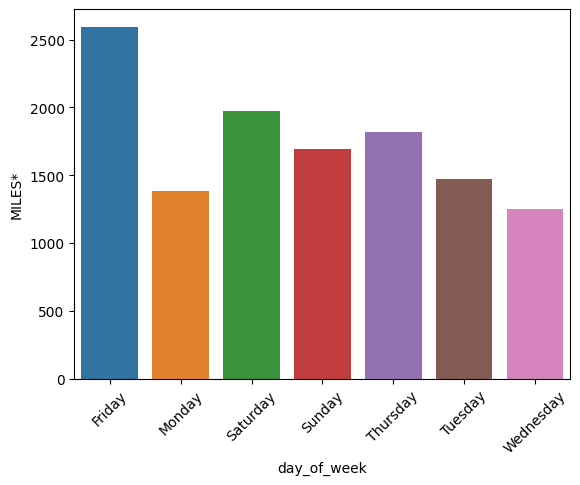

In [39]:
sns.barplot(x=total_miles_on_day.index, y='MILES*', data=total_miles_on_day, order=total_miles_on_day.index.unique())
plt.xticks(rotation=45)

In [40]:
df['day_of_week'].value_counts()

Friday       206
Tuesday      175
Monday       174
Thursday     154
Saturday     150
Sunday       148
Wednesday    147
Name: day_of_week, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Friday'),
  Text(1, 0, 'Tuesday'),
  Text(2, 0, 'Monday'),
  Text(3, 0, 'Thursday'),
  Text(4, 0, 'Saturday'),
  Text(5, 0, 'Sunday'),
  Text(6, 0, 'Wednesday')])

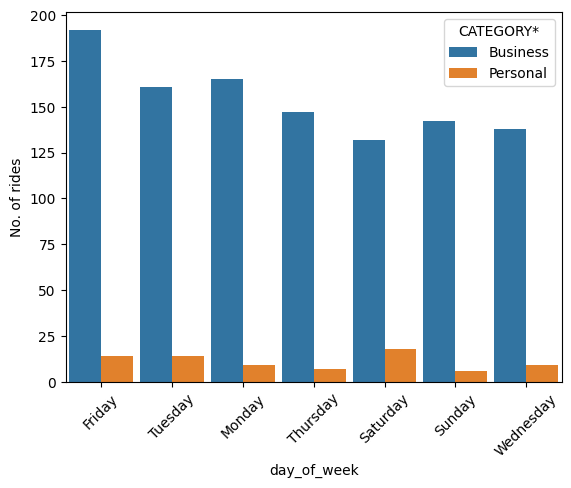

In [41]:
sns.countplot(x='day_of_week',hue="CATEGORY*",data=df,order=pd.value_counts(df['day_of_week']).index,orient='h',width=0.9)
plt.ylabel("No. of rides")
plt.xticks(rotation=45)

In [132]:
purpose_of_trip_in_month_with_miles=pd.DataFrame(df.groupby(['month_of_year',"CATEGORY*"]).sum()["MILES*"])
purpose_of_trip_in_month_with_miles.reset_index(inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_27420\2779656301.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  purpose_of_trip_in_month_with_miles=pd.DataFrame(df.groupby(['month_of_year',"CATEGORY*"]).sum()["MILES*"])


Text(0, 0.5, 'Total Round Trips')

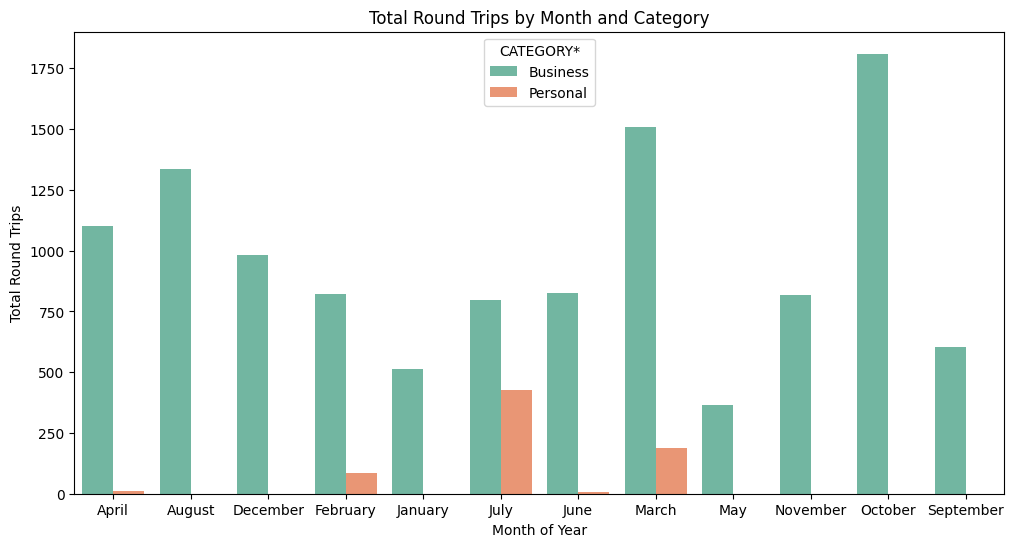

In [138]:
plt.figure(figsize=(12, 6))
sns.barplot(x='month_of_year', y='MILES*', hue='CATEGORY*', data=purpose_of_trip_in_month_with_miles, palette=sns.color_palette("Set2"))

# Set plot labels and title
plt.title('Total Miles by Month and Category')
plt.xlabel('Month of Year')
plt.ylabel('Total Round Trips')

<Axes: xlabel='staring_hour', ylabel='count'>

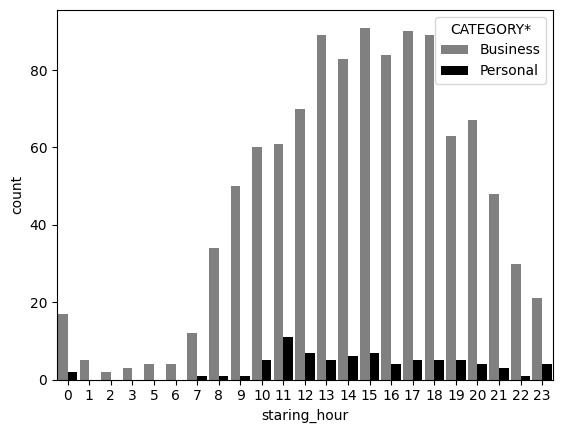

In [67]:
sns.countplot(x="staring_hour",hue="CATEGORY*",data=df,orient='h',width=0.9,palette={"Business": "grey", "Personal": "black"})

<Axes: xlabel='ending_hour', ylabel='count'>

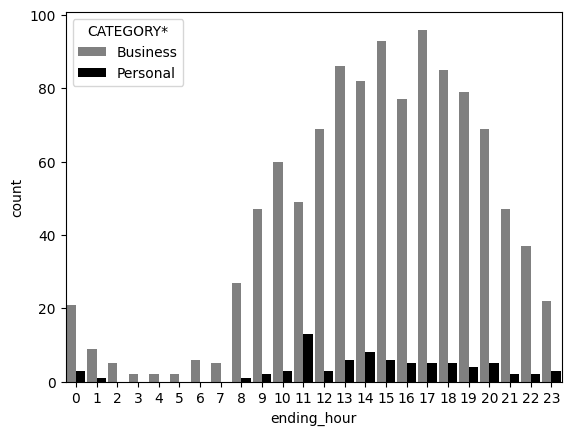

In [68]:
sns.countplot(x="ending_hour",hue="CATEGORY*",data=df,orient='h',width=0.9,palette={"Business": "grey", "Personal": "black"})